In [17]:
import pandas as pd
import numpy as np
from collections import Counter
from math import log
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
import pandas as pd
df = pd.read_csv('/content/sample_data/Car Accident1.csv')


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from xgboost.sklearn import XGBClassifier

In [20]:
dataset = pd.read_csv("/content/sample_data/Car Accident1.csv")
dataset

,Age,Gender,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,Unknown,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,2
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,No distancing,2
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Changing lane to the right,1
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Driving under the influence of drugs,2


In [21]:
AccDict={}

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      12316 non-null  object
 1   Gender                   12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

In [23]:
dataset.isnull().sum()

,0
Age,0
Gender,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Lanes_or_Medians,0
Types_of_Junction,0
Road_surface_type,0
Light_conditions,0
Weather_conditions,0


In [24]:
dataset.select_dtypes(include='object').nunique()

,0
Age,5
Gender,3
Educational_level,7
Vehicle_driver_relation,4
Driving_experience,8
Lanes_or_Medians,7
Types_of_Junction,8
Road_surface_type,6
Light_conditions,4
Weather_conditions,9


In [25]:
# dataset['RBC'].fillna(dataset['RBC'].mode()[0], inplace=True)
# dataset['Na'].fillna(dataset['Na'].median(), inplace=True)
# dataset['K'].fillna(dataset['K'].median(), inplace=True)

In [26]:
labels,counts =  pd.factorize(dataset['Age'])
print(counts)
labels,counts =  pd.factorize(dataset['Gender'])
print(counts)
labels,counts =  pd.factorize(dataset['Educational_level'])
print(counts)
labels,counts =  pd.factorize(dataset['Vehicle_driver_relation'])
print(counts)
labels,counts =  pd.factorize(dataset['Driving_experience'])
print(counts)
labels,counts =  pd.factorize(dataset['Lanes_or_Medians'])
print(counts)
labels,counts =  pd.factorize(dataset['Types_of_Junction'])
print(counts)
labels,counts =  pd.factorize(dataset['Road_surface_type'])
print(counts)
labels,counts =  pd.factorize(dataset['Light_conditions'])
print(counts)
labels,counts =  pd.factorize(dataset['Weather_conditions'])
print(counts)
labels,counts =  pd.factorize(dataset['Type_of_collision'])
print(counts)
labels,counts =  pd.factorize(dataset['Vehicle_movement'])
print(counts)
labels,counts =  pd.factorize(dataset['Pedestrian_movement'])
print(counts)
labels,counts =  pd.factorize(dataset['Cause_of_accident'])
print(counts)
labels,counts =  pd.factorize(dataset['Accident_severity'])
print(counts)

Index(['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown'], dtype='object')
Index(['Male', 'Female', 'Unknown'], dtype='object')
Index(['Above high school', 'Junior high school', 'Unknown',
       'Elementary school', 'High school', 'Illiterate', 'Writing & reading'],
      dtype='object')
Index(['Employee', 'Unknown', 'Owner', 'Other'], dtype='object')
Index(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'Unknown', 'No Licence',
       'Below 1yr', 'unknown'],
      dtype='object')
Index(['Unknown', 'Undivided Two way', 'other', 'Double carriageway (median)',
       'One way', 'Two-way (divided with solid lines road marking)',
       'Two-way (divided with broken lines road marking)'],
      dtype='object')
Index(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other', 'Unknown',
       'T Shape', 'X Shape'],
      dtype='object')
Index(['Asphalt roads', 'Earth roads', 'Unknown',
       'Asphalt roads with some distress', 'Gravel roads', 'Other'],
      dtype='object')
Index(['Daylight'

In [27]:
dataset['Driving_experience'] = dataset['Driving_experience'].replace('unknown', 'Unknown')
labels,counts =  pd.factorize(dataset['Driving_experience'])
print(counts)
dataset['Road_surface_type'] = dataset['Road_surface_type'].replace('Asphalt roads with some distress', 'Asphalt roads')
labels,counts =  pd.factorize(dataset['Road_surface_type'])
print(counts)

Index(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'Unknown', 'No Licence',
       'Below 1yr'],
      dtype='object')
Index(['Asphalt roads', 'Earth roads', 'Unknown', 'Gravel roads', 'Other'], dtype='object')


In [28]:
# dataset['class'] = dataset['class'].replace(['ckd\t'],'ckd')
# dataset

In [29]:
# dataset['diabetes mellitus'] = dataset['diabetes mellitus'].replace(['\tno'],'no')
# dataset['diabetes mellitus'] = dataset['diabetes mellitus'].replace([' yes'],'yes')
# dataset['diabetes mellitus'] = dataset['diabetes mellitus'].replace(['\tyes'],'yes')
# dataset['coronary artery disease'] = dataset['coronary artery disease'].replace(['\tno'],'no')
# labels,counts =  pd.factorize(dataset['coronary artery disease'])
# print(counts)

In [30]:
dataset.isnull().sum()

,0
Age,0
Gender,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Lanes_or_Medians,0
Types_of_Junction,0
Road_surface_type,0
Light_conditions,0
Weather_conditions,0


<Axes: title={'center': 'Age'}, xlabel='Age', ylabel='Count'>

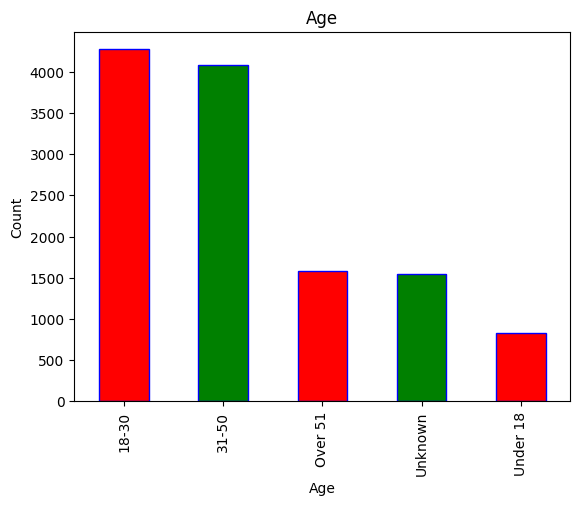

In [31]:
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Count')

dataset['Age'].value_counts().plot.bar(color=['red', 'green'],edgecolor='blue')

<Axes: title={'center': 'Road_surface_type'}, xlabel='Road_surface_type'>

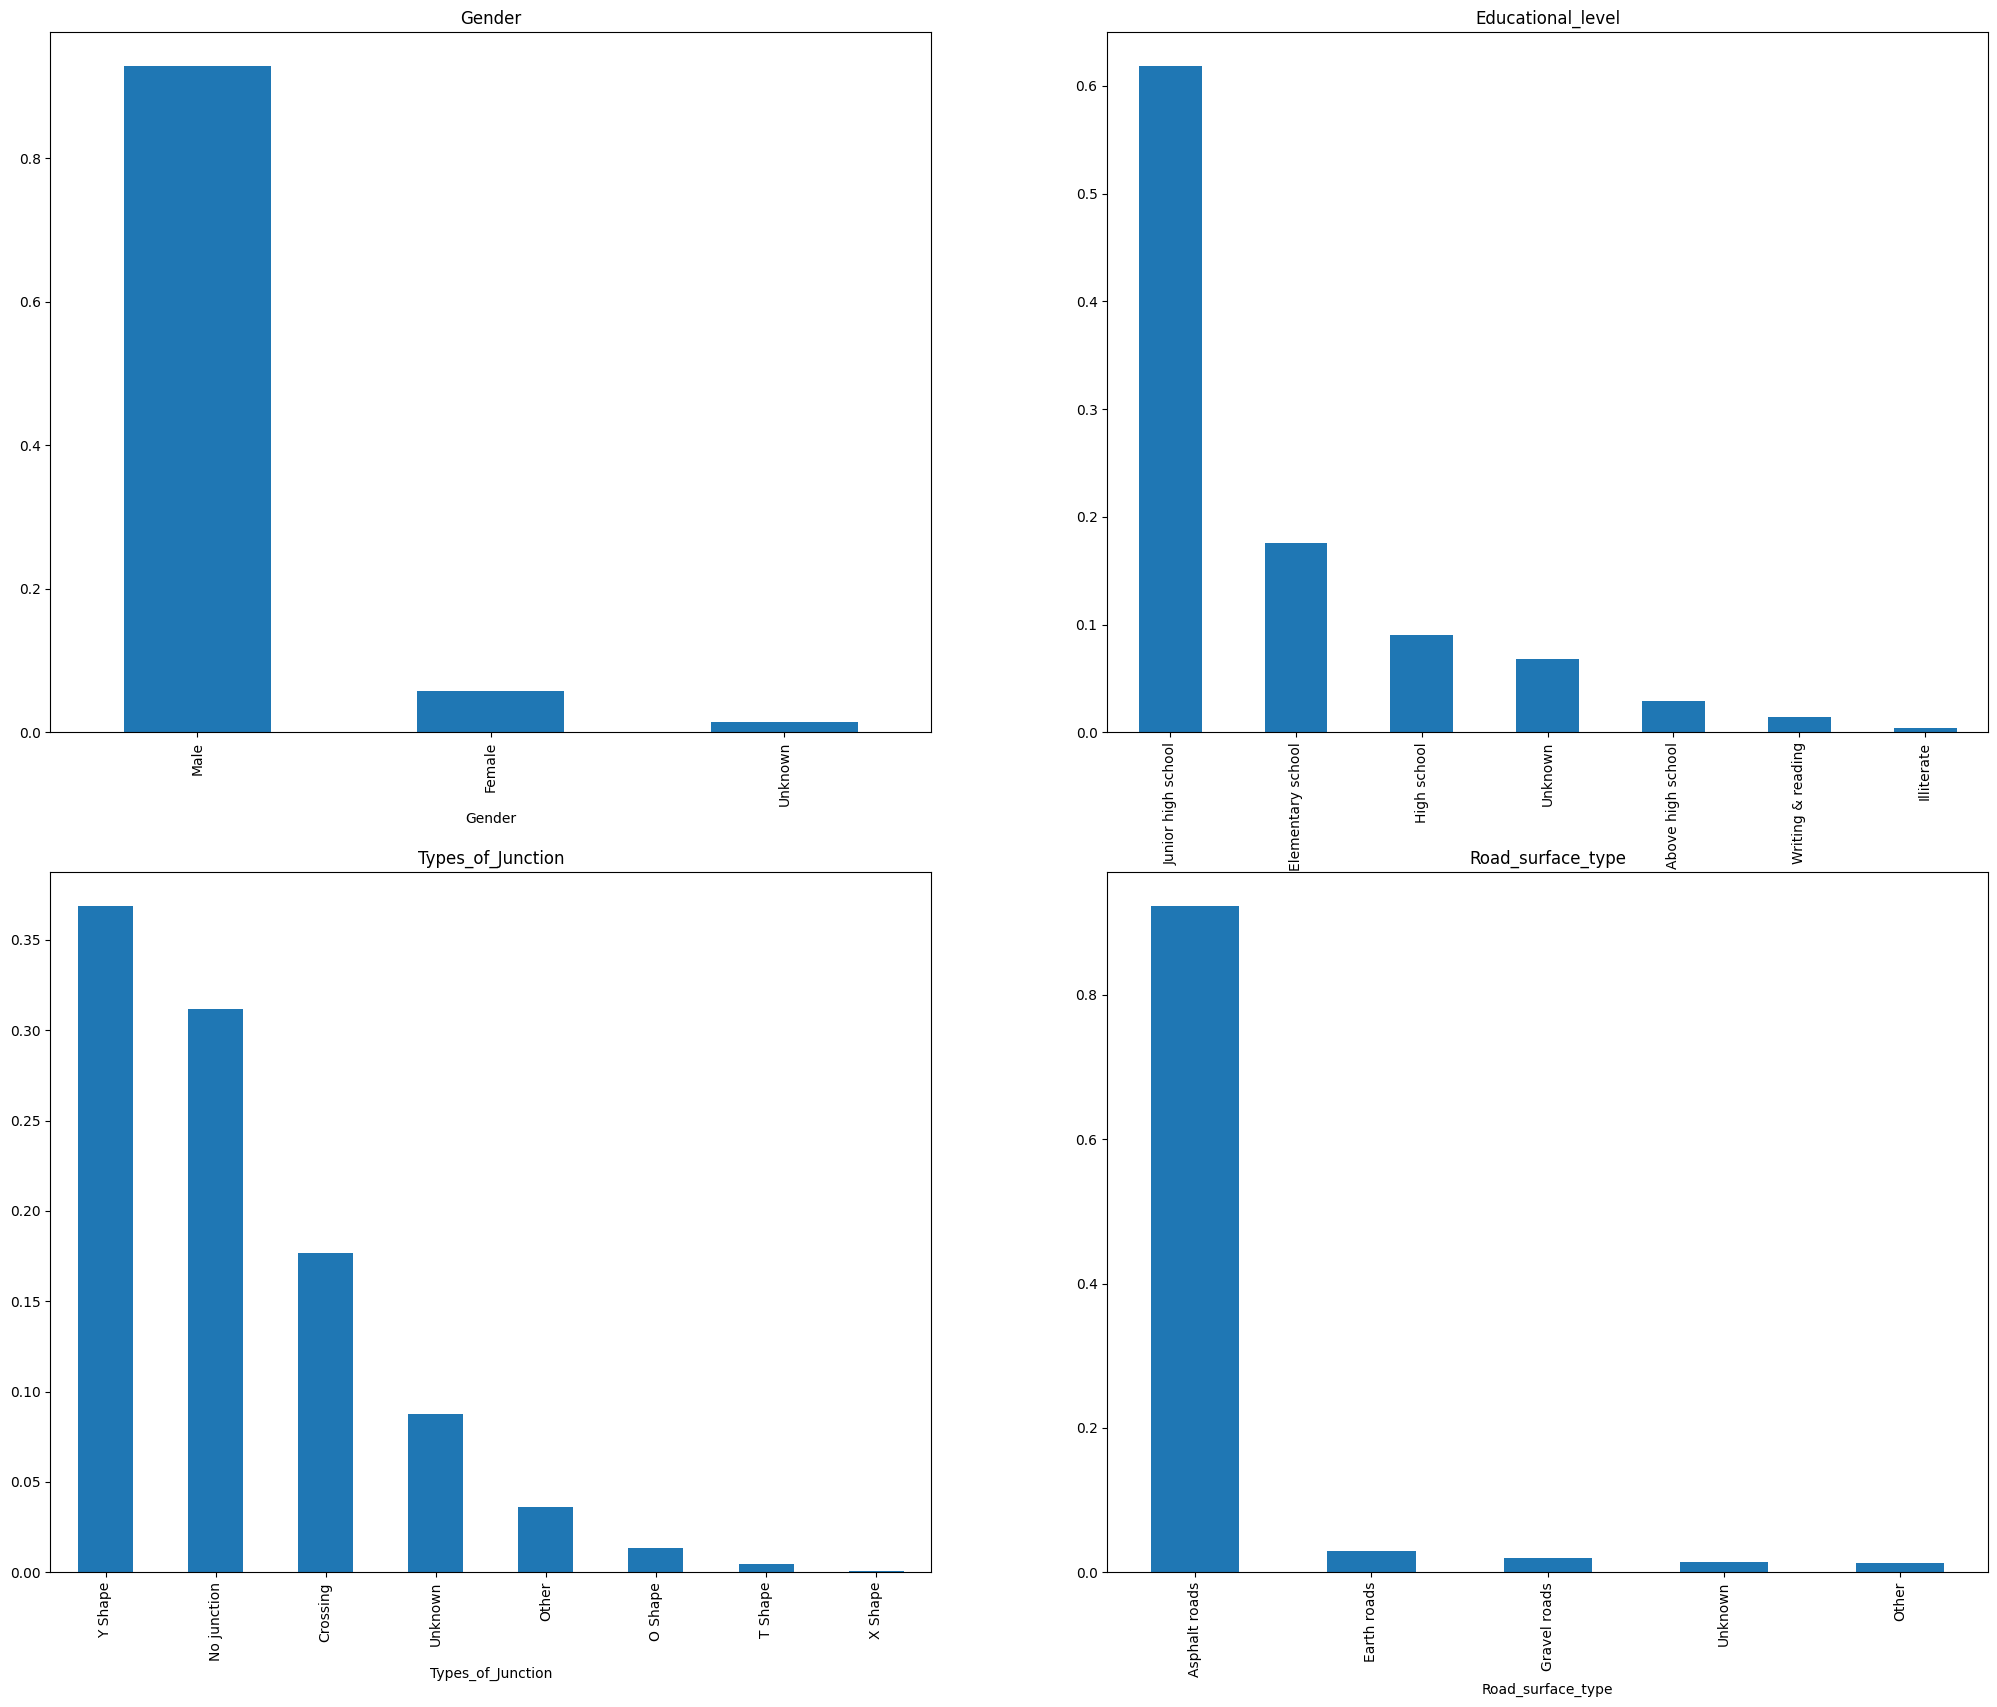

In [32]:
plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
dataset['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(2,2,2)
dataset['Educational_level'].value_counts(normalize=True).plot.bar(title='Educational_level')
plt.subplot(2,2,3)
dataset['Types_of_Junction'].value_counts(normalize=True).plot.bar(title='Types_of_Junction')
plt.subplot(2,2,4)
dataset['Road_surface_type'].value_counts(normalize=True).plot.bar(title='Road_surface_type')

<Axes: title={'center': 'Light_conditions'}, xlabel='Light_conditions'>

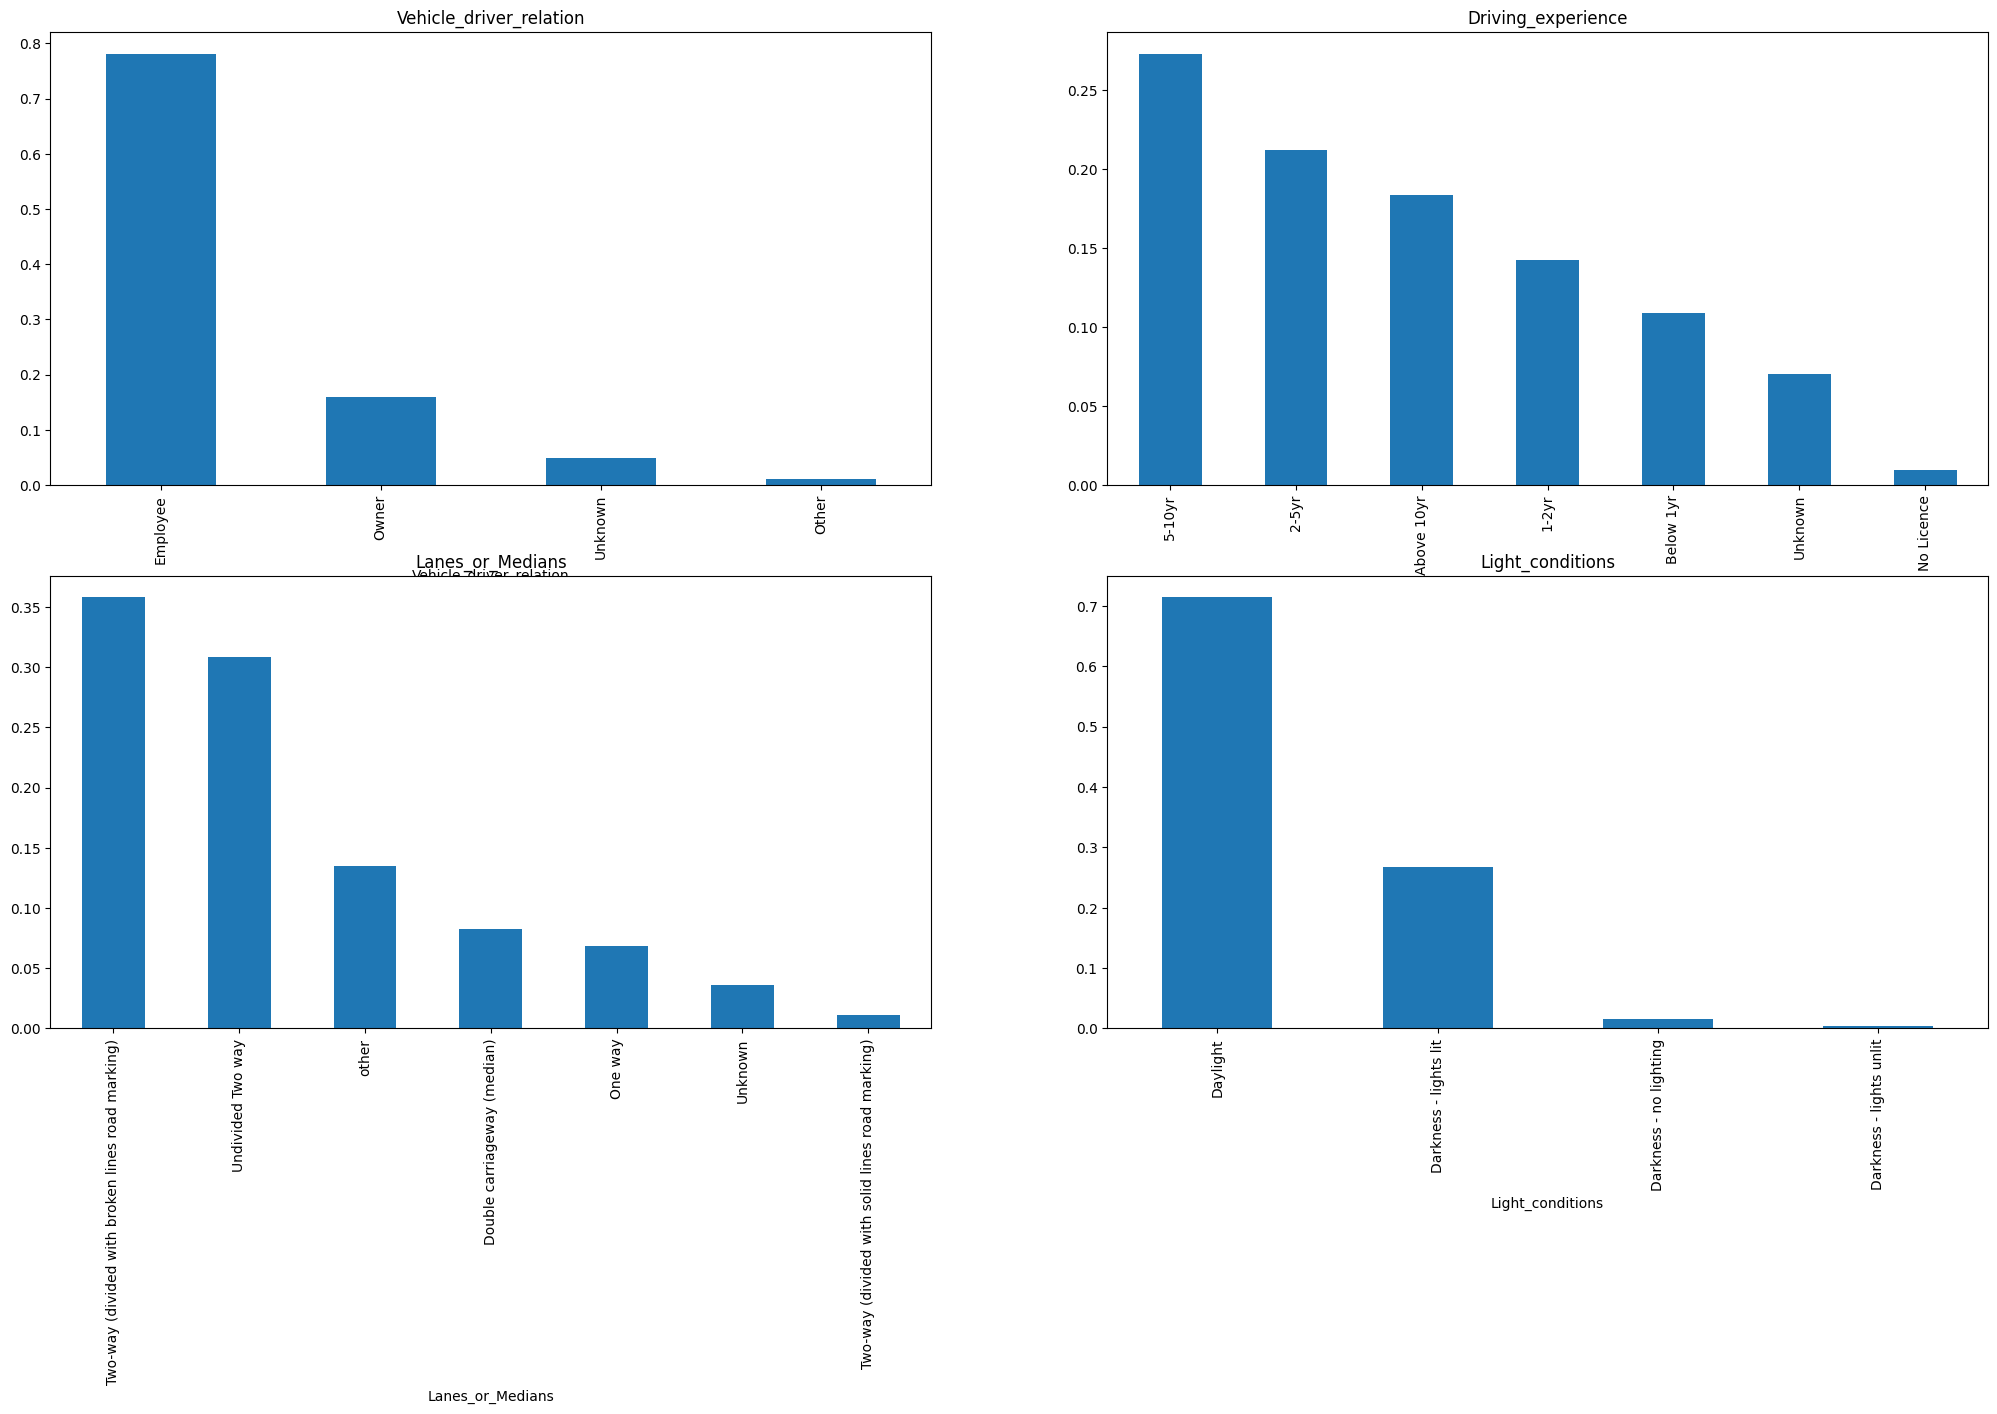

In [33]:
plt.figure(figsize=(25,20))
plt.subplot(3,2,1)
dataset['Vehicle_driver_relation'].value_counts(normalize=True).plot.bar(title='Vehicle_driver_relation')
plt.subplot(3,2,2)
dataset['Driving_experience'].value_counts(normalize=True).plot.bar(title='Driving_experience')
plt.subplot(3,2,3)
dataset['Lanes_or_Medians'].value_counts(normalize=True).plot.bar(title='Lanes_or_Medians')
plt.subplot(3,2,4)
dataset['Light_conditions'].value_counts(normalize=True).plot.bar(title='Light_conditions')


In [34]:
# plt.figure(figsize=(40,30))
# plt.subplot(5,2,1)
# dataset['RBC'].value_counts(normalize=True).plot.bar(title='RBC')
# plt.subplot(5,2,2)
# dataset['pus cell'].value_counts(normalize=True).plot.bar(title='pus cell')
# plt.subplot(5,2,3)
# dataset['pus cell clumps'].value_counts(normalize=True).plot.bar(title='pus cell clumps')
# plt.subplot(5,2,4)
# dataset['Bac'].value_counts(normalize=True).plot.bar(title='bac')


# plt.subplot(5,2,5)
# dataset['hypertension'].value_counts(normalize=True).plot.bar(title='hypertension')
# plt.subplot(5,2,6)
# dataset['diabetes mellitus'].value_counts(normalize=True).plot.bar(title='diabetes mellitus')
# plt.subplot(5,2,7)
# dataset['coronary artery disease'].value_counts(normalize=True).plot.bar(title='coronary artery disease')
# plt.subplot(5,2,8)
# dataset['appetite'].value_counts(normalize=True).plot.bar(title='appetite')
# plt.subplot(5,2,9)
# dataset['pedal edema'].value_counts(normalize=True).plot.bar(title='pedal edema')
# plt.subplot(5,2,10)
# dataset['anemia'].value_counts(normalize=True).plot.bar(title='anemia')


In [35]:
# labels,counts = pd.factorize(dataset['RBC'])
# counts

In [36]:
labels,counts =  pd.factorize(dataset['Age'])
print(counts)
labels,counts =  pd.factorize(dataset['Gender'])
print(counts)
labels,counts =  pd.factorize(dataset['Educational_level'])
print(counts)
labels,counts =  pd.factorize(dataset['Vehicle_driver_relation'])
print(counts)
labels,counts =  pd.factorize(dataset['Driving_experience'])
print(counts)
labels,counts =  pd.factorize(dataset['Lanes_or_Medians'])
print(counts)
labels,counts =  pd.factorize(dataset['Types_of_Junction'])
print(counts)
labels,counts =  pd.factorize(dataset['Road_surface_type'])
print(counts)
labels,counts =  pd.factorize(dataset['Light_conditions'])
print(counts)
labels,counts =  pd.factorize(dataset['Weather_conditions'])
print(counts)
labels,counts =  pd.factorize(dataset['Type_of_collision'])
print(counts)
labels,counts =  pd.factorize(dataset['Vehicle_movement'])
print(counts)
labels,counts =  pd.factorize(dataset['Pedestrian_movement'])
print(counts)
labels,counts =  pd.factorize(dataset['Cause_of_accident'])
print(counts)
labels,counts =  pd.factorize(dataset['Accident_severity'])
print(counts)

Index(['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown'], dtype='object')
Index(['Male', 'Female', 'Unknown'], dtype='object')
Index(['Above high school', 'Junior high school', 'Unknown',
       'Elementary school', 'High school', 'Illiterate', 'Writing & reading'],
      dtype='object')
Index(['Employee', 'Unknown', 'Owner', 'Other'], dtype='object')
Index(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'Unknown', 'No Licence',
       'Below 1yr'],
      dtype='object')
Index(['Unknown', 'Undivided Two way', 'other', 'Double carriageway (median)',
       'One way', 'Two-way (divided with solid lines road marking)',
       'Two-way (divided with broken lines road marking)'],
      dtype='object')
Index(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other', 'Unknown',
       'T Shape', 'X Shape'],
      dtype='object')
Index(['Asphalt roads', 'Earth roads', 'Unknown', 'Gravel roads', 'Other'], dtype='object')
Index(['Daylight', 'Darkness - lights lit', 'Darkness - no lighting',
       

In [37]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in dataset.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(dataset[col].unique())

    # Transform the column using the encoder
    dataset[col] = label_encoder.transform(dataset[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {dataset[col].unique()}")

Age: [0 1 3 2 4]
Gender: [1 0 2]
Educational_level: [0 4 5 1 2 3 6]
Vehicle_driver_relation: [0 3 2 1]
Driving_experience: [0 3 2 1 6 5 4]
Lanes_or_Medians: [5 4 6 0 1 3 2]
Types_of_Junction: [1 7 0 2 3 5 4 6]
Road_surface_type: [0 1 4 2 3]
Light_conditions: [3 0 2 1]
Weather_conditions: [2 4 5 0 3 8 6 7 1]
Type_of_collision: [3 8 2 0 5 6 4 1 9 7]
Vehicle_movement: [ 2 10  3  9 12  1  7 11  6  8  5  4  0]
Pedestrian_movement: [5 0 1 6 2 3 7 8 4]
Cause_of_accident: [ 9 16  0  1 14 13 12 11 10  7  8 15  3  2  4 19 17 18  5  6]


In [38]:
dataset

,Age,Gender,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0,1,0,0,0,5,1,0,3,2,3,2,5,9,2
1,1,1,4,0,3,4,1,0,3,2,8,2,5,16,2
2,0,1,4,0,0,6,1,0,3,2,2,2,5,0,1
3,0,1,4,0,2,6,7,1,0,2,8,2,5,1,2
4,0,1,4,0,1,6,7,0,0,2,8,2,5,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1,1,5,0,1,4,1,0,3,2,8,2,5,10,2
12312,4,1,1,0,2,2,1,0,3,2,8,4,5,10,2
12313,2,1,4,0,2,2,1,0,3,2,8,4,5,1,1
12314,0,0,4,0,3,4,1,0,0,2,8,4,5,5,2


In [39]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y

array([2, 2, 1, ..., 1, 2, 2])

In [40]:
X

array([[ 0,  1,  0, ...,  2,  5,  9],
       [ 1,  1,  4, ...,  2,  5, 16],
       [ 0,  1,  4, ...,  2,  5,  0],
       ...,
       [ 2,  1,  4, ...,  4,  5,  1],
       [ 0,  0,  4, ...,  4,  5,  5],
       [ 0,  1,  4, ...,  8,  1,  1]])

In [41]:
X = preprocessing.normalize(X)


In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [43]:
logistic_Regression = LogisticRegression(max_iter=1000,random_state=0)
logistic_Regression.fit(x_train,y_train)
y_pred = logistic_Regression.predict(x_test)
log = accuracy_score(y_pred,y_test)*100
li = {'Logistic Regression':log}
AccDict.update(li)
print(log)

83.46865865540761


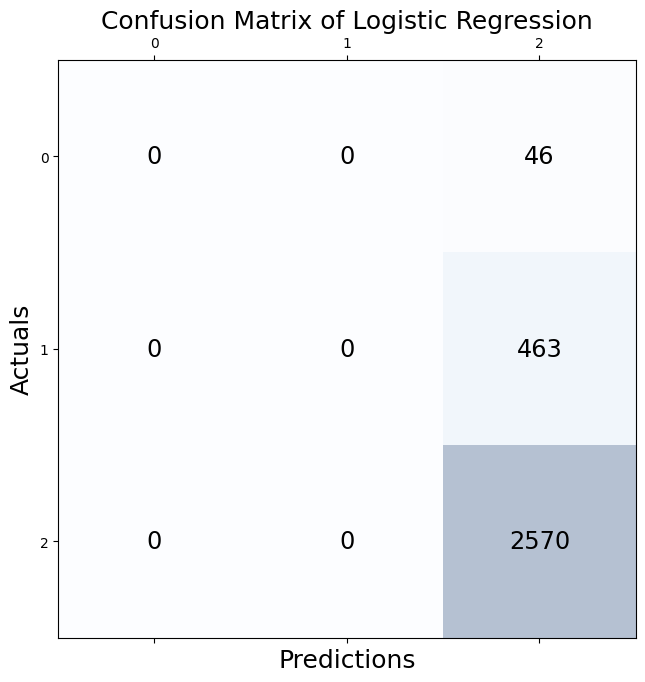

In [44]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Logistic Regression', fontsize=18)
plt.show()

In [45]:
# print(classification_report(y_pred,y_test))

In [46]:
knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
KNN = accuracy_score(pred_knn,y_test)*100
ki = {'KNN before':KNN}
AccDict.update(ki)
print(KNN)


83.46865865540761


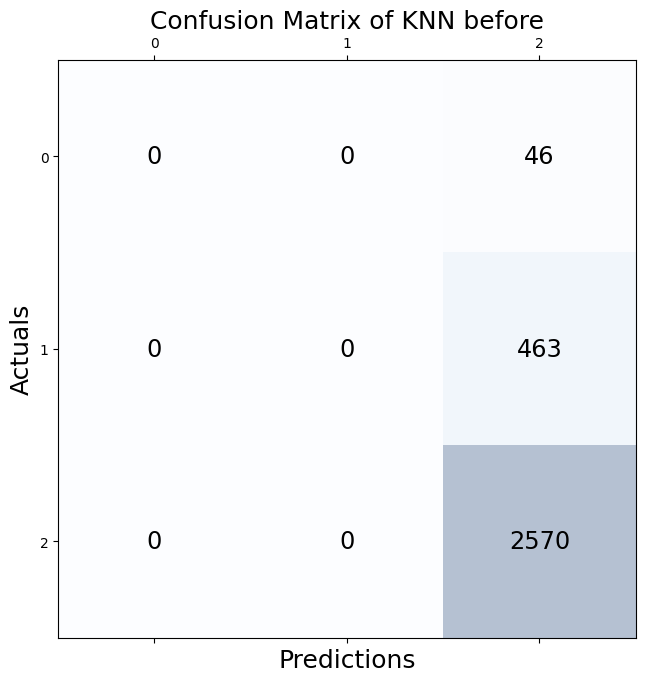

In [47]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_knn)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of KNN before', fontsize=18)
plt.show()

Text(0, 0.5, 'error rate')

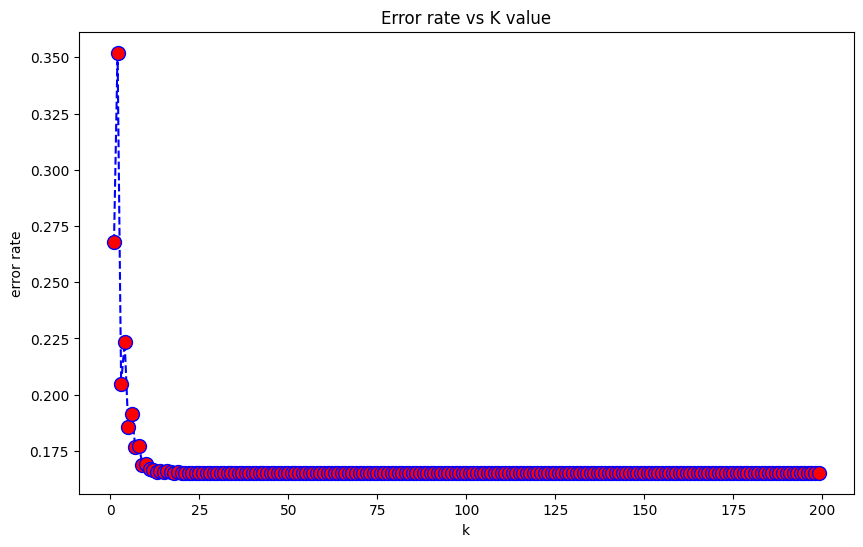

In [ ]:
error=[]
for i in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred1=knn.predict(x_test)
    error.append(np.mean(pred1!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,200),error,color='blue',linestyle='dashed',marker = 'o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('k')
plt.ylabel('error rate')

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train,y_train)
pred_knn2 = knn2.predict(x_test)
KNN2 = accuracy_score(pred_knn2,y_test)*100
ki2 = {'KNN after':KNN2}
AccDict.update(ki2)
print(KNN2)


81.45501786294251


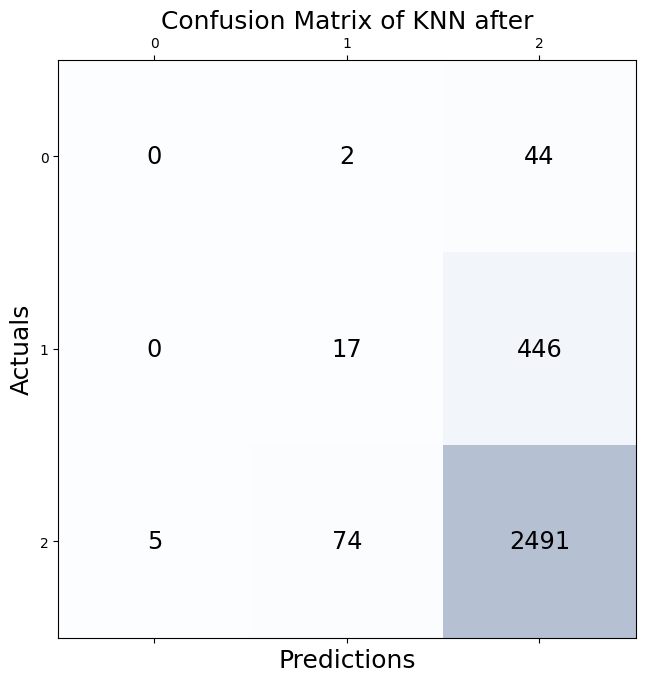

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_knn2)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of KNN after', fontsize=18)
plt.show()

In [ ]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb = gnb.predict(x_test)
GNB = accuracy_score(pred_gnb,y_test)*100
gb = {'Naive Bayes':GNB}
AccDict.update(gb)
print(f"classification report of naive bayes is: ")
print(classification_report(y_test,pred_gnb))

classification report of naive bayes is: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.00      0.00      0.00       463
           2       0.83      1.00      0.91      2570

    accuracy                           0.83      3079
   macro avg       0.28      0.33      0.30      3079
weighted avg       0.70      0.83      0.76      3079



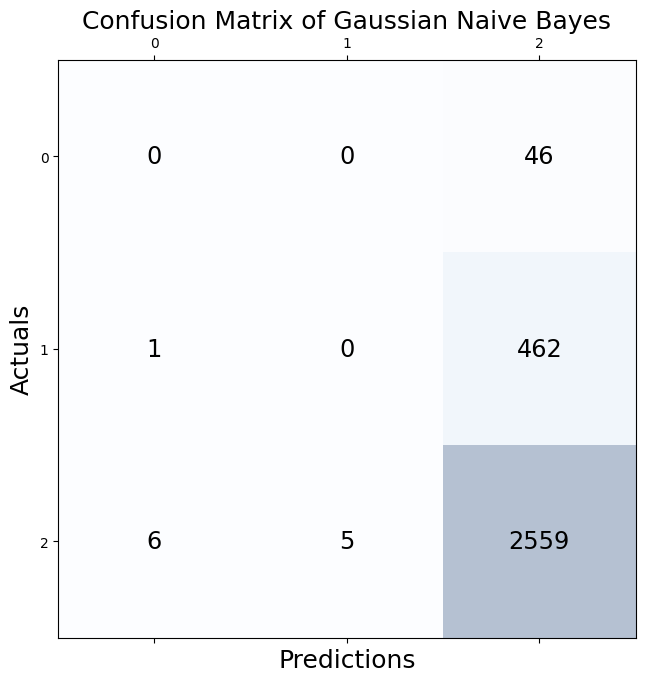

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_gnb)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Gaussian Naive Bayes', fontsize=18)
plt.show()

In [ ]:
svc = SVC(max_iter=1000,random_state=0)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
SVC = accuracy_score(pred_svc,y_test)*100
sv = {'SVC':SVC}
AccDict.update(sv)
print(SVC)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


75.86878856771679


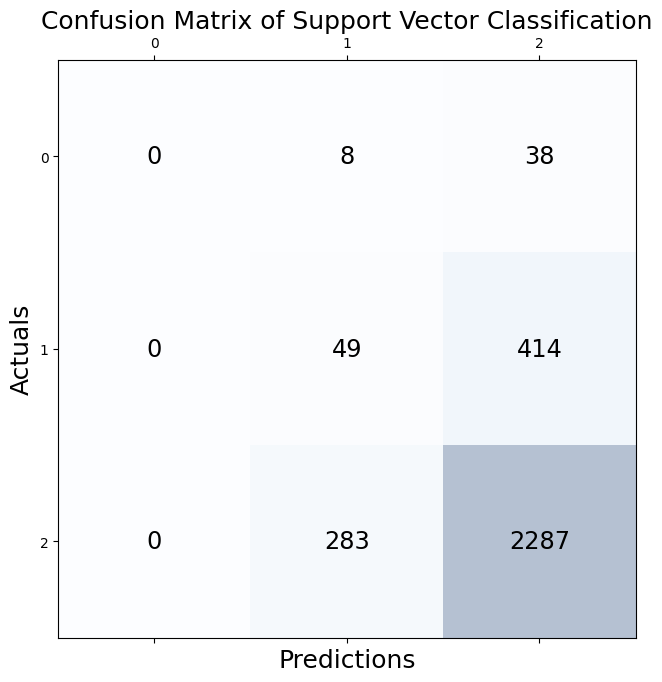

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_svc)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Support Vector Classification', fontsize=18)
plt.show()

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

# Define the AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=80, estimator=model, random_state=0)

# Fit the model
adaboost.fit(x_train, y_train)

# Make predictions
pred = adaboost.predict(x_test)

# Calculate accuracy
ada = accuracy_score(y_test, pred) * 100
ad = {'adaboost': ada}
AccDict.update(ad)

# Print classification report
print("Classification report of AdaBoost is:")
print(classification_report(y_test, pred))

Classification report of AdaBoost is:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.00      0.00      0.00       463
           2       0.83      1.00      0.91      2570

    accuracy                           0.83      3079
   macro avg       0.28      0.33      0.30      3079
weighted avg       0.70      0.83      0.76      3079



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


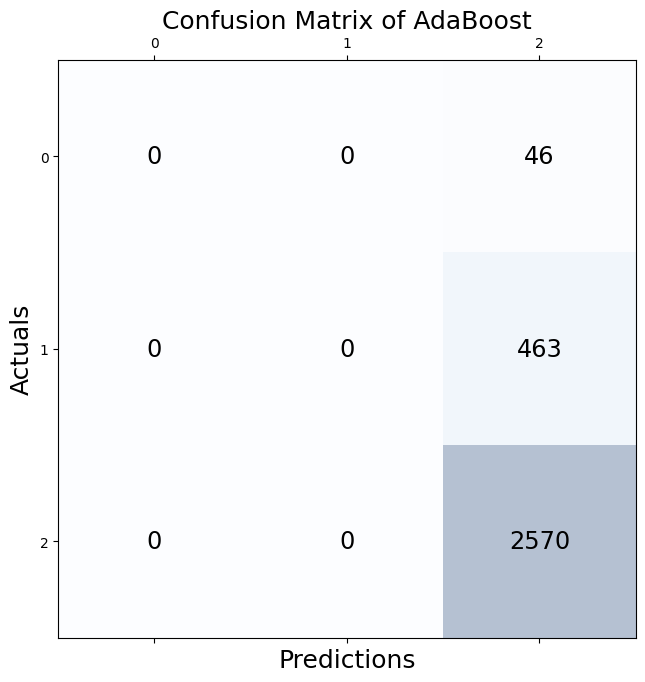

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of AdaBoost', fontsize=18)
plt.show()

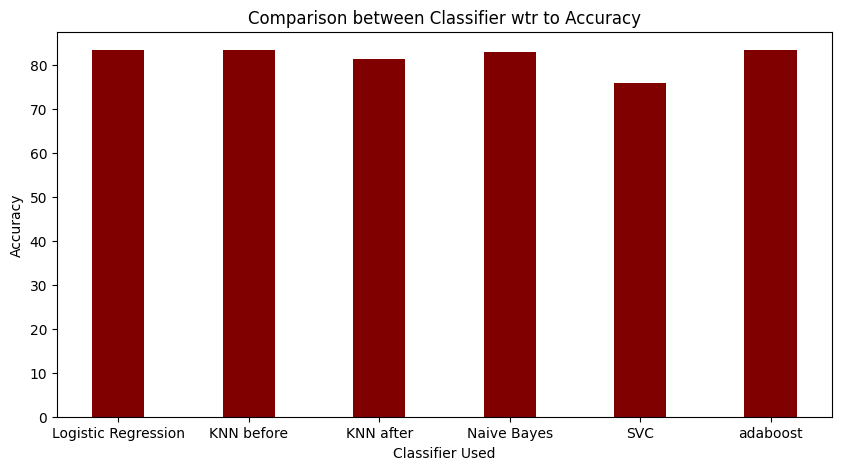

In [ ]:
# creating the dataset
# data = {'C':20, 'C++':15, 'Java':30,
#         'Python':35}
Classifier = list(AccDict.keys())
Accuracy = list(AccDict.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(Classifier, Accuracy, color ='maroon',
        width = 0.4)

plt.xlabel("Classifier Used")
plt.ylabel("Accuracy")
plt.title("Comparison between Classifier wtr to Accuracy")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
print(model.predict(([[0,1,0,0,0,5,1,0,3,2,3,2,5,9]])))

[2]


In [ ]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))

In [ ]:
import pickle
with open('classifier.pkl','wb') as file:
  pickle.dump(model, file)

In [ ]:
with open('classifier.pkl','rb') as file:
  clf = pickle.load(file)

In [ ]:
prediction = clf.predict([[0,1,0,0,0,5,1,0,3,2,3,2,5,9]])

In [ ]:
prediction

array([2])